In [1]:
envname = 'variables/loop_stim10e-16.0et6.0ph1.0p1.0tcorrvaryplNonebp0.5.pkl'

In [2]:
# import stuff
from placerg.funcs import *
from placerg.funcsrg import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

In [3]:
# set up notebook displayt
np.set_printoptions(threshold=5)
alpha=0.4
color='black'
cmap='Greys'
colorline='black'
linethick=3.
colorfit='grey'
plt.style.use('seaborn-paper')
palit=['black', 'firebrick',  \
       'coral', 'goldenrod', 'gold', 'yellowgreen', 'greenyellow', 'lime', 'aquamarine', 'mediumturquoise',\
        'lightskyblue', 'cornflowerblue', 'mediumpurple', 'mediumorchid', 'violet', 'mediumvioletred', \
         'fuchsia', 'deeppink', \
         'hotpink', 'pink' ]
fontsize=80
ticksize=60
fontsizesmall=30
ticksizesmall=25
legendsize=60
alpha=.3
colorfit='gray'
linecolor='black'
mycmap = cm.gnuplot
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [4]:
# load in objects
allo=load_object(envname)

In [5]:
labels=[]
for i in range(len(allo.timeconst)):
    labels.append(np.round((np.max(allo.timeconst[i])-np.min(allo.timeconst[i])), 3))

In [6]:
allo.label=labels

In [7]:
for i in range(len(allo.timeconst)):
    print(np.mean(allo.timeconst[i]))

2.0
3.0
5.0
2.5500000000000003


In [8]:
allo.label=['2.0', '3.0', '5.0', 'mix of 5.0 and 0.1']

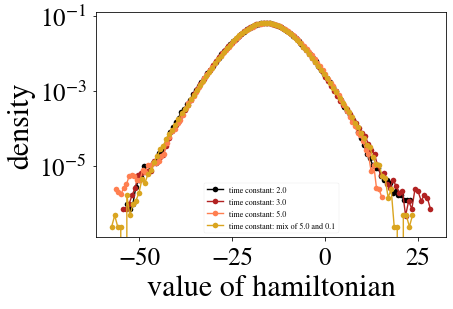

In [9]:
"""
histogram hamiltonians
"""
for i in range(len(allo.hamx)):
    plt.plot(allo.hamx[i],allo.ham[i], '-o', \
                 color=palit[i],\
                 label=str(allo.labeltype[i])+': '+str(allo.label[i]))
plt.yscale('log')
plt.xlabel('value of hamiltonian', fontsize=fontsizesmall)
plt.ylabel('density', fontsize=fontsizesmall)
plt.tick_params(labelsize=ticksizesmall)
plt.tight_layout()
plt.legend()
name=str(envname)+'hamiltonian.png'
plt.savefig(name)


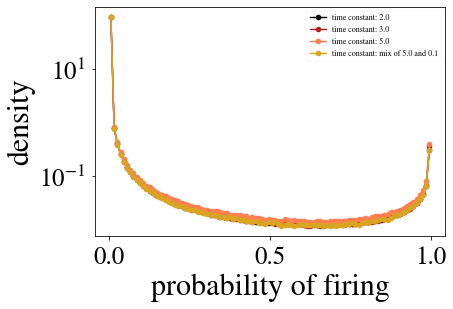

In [10]:
"""
histogram probability of firing
"""

for i in range(len(allo.probx)):
    plt.plot(allo.probx[i],allo.prob[i], '-o', label=str(allo.labeltype[i])+': '+str(allo.label[i]),\
                color=palit[i])

plt.yscale('log')
plt.xlabel('probability of firing', fontsize=fontsizesmall)
plt.ylabel('density', fontsize=fontsizesmall)
plt.tick_params(labelsize=ticksizesmall)
plt.tight_layout()
plt.legend()
name=str(envname)+'prob.png'
plt.savefig(name)

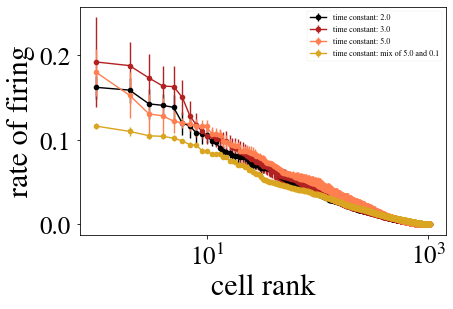

In [11]:
"""
plot average activity for each cell
avg cell activity vs. cell rank (ranked by most active to least active)
"""

for i in range(len(allo.ratex)):
    plt.errorbar(allo.ratex[i]*1024,allo.rate[i], allo.rateerr[i],label=str(allo.labeltype[i])+': '\
                 +str(allo.label[i]),\
                 color=palit[i], marker='o')

plt.xscale('log')
plt.xlabel('cell rank', fontsize=fontsizesmall)
plt.ylabel('rate of firing', fontsize=fontsizesmall)
plt.tick_params(labelsize=ticksizesmall)
plt.tight_layout()
plt.legend()
name=str(envname)+'rank.png'
plt.savefig(name)

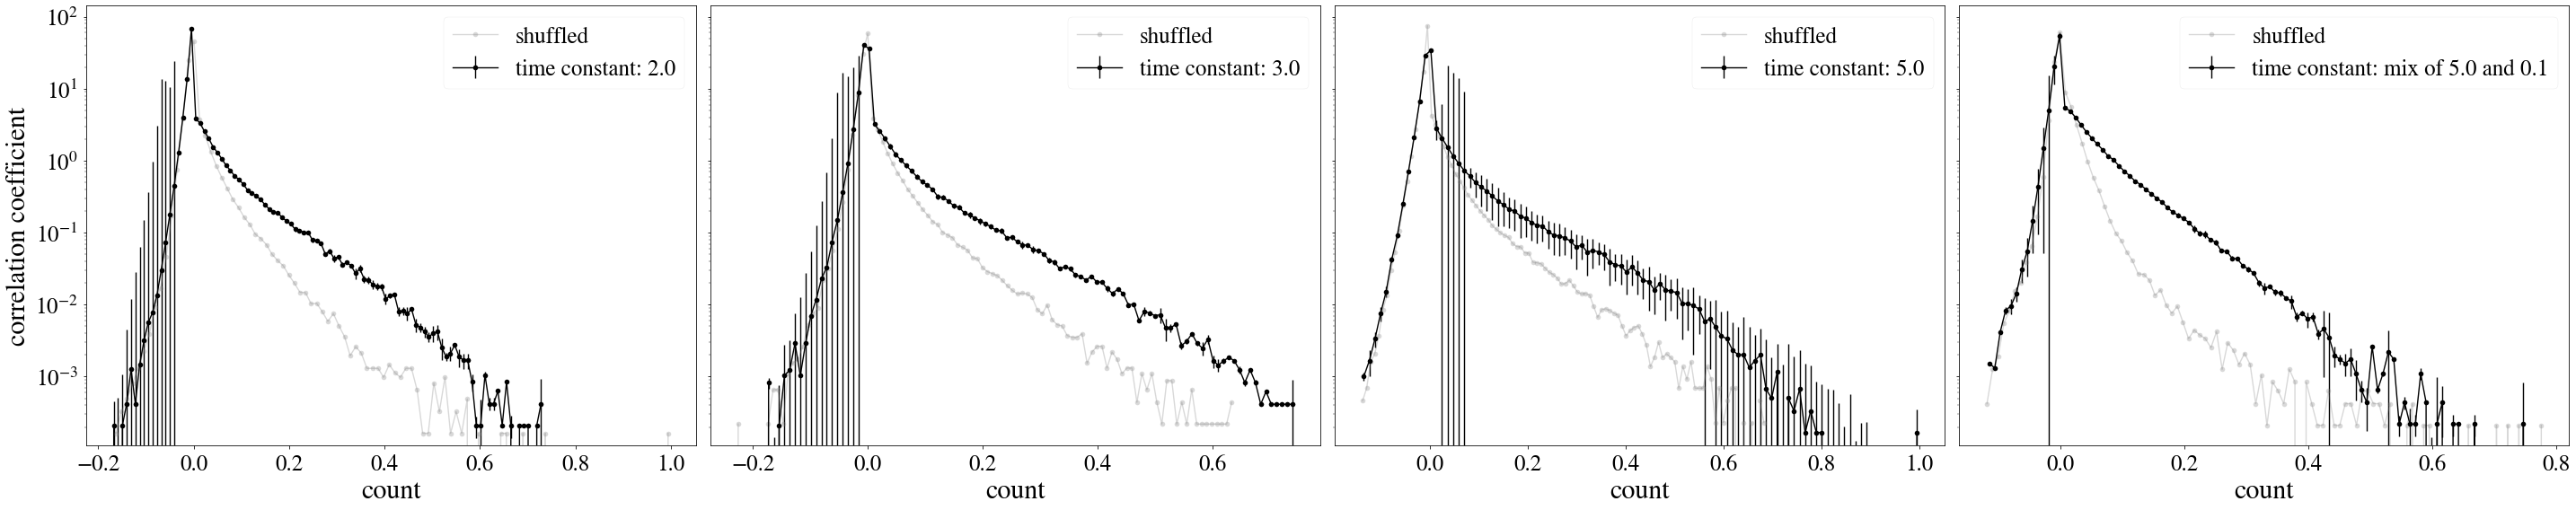

In [12]:
"""
plot distribution of correlation coefficients
"""

fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(10*len(allo.coeffx), \
                                                                    int(2*len(allo.coeffx))))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for i in range(int(len(allo.coeffx))):
        ax[i].errorbar(allo.coeffx[i], allo.coeff[i], allo.coefferr[i], marker='o', \
                     label=str(allo.labeltype[i])+': '+str(allo.label[i]), color='black')
        ax[i].plot(allo.shuffcoeffx[i], allo.shuffcoeff[i], '-o', \
                     label='shuffled', color=colorfit, alpha=alpha)
        ax[i].set_xlabel('count', fontsize=fontsizesmall)
        ax[i].tick_params(labelsize=ticksizesmall)
        ax[i].legend(fontsize=ticksizesmall)
        ax[i].set_yscale('log')
plt.tight_layout()
name=str(envname)+'corr.png'
plt.savefig(name)

# variance of activity at each RG step over clusters

/home/mia/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


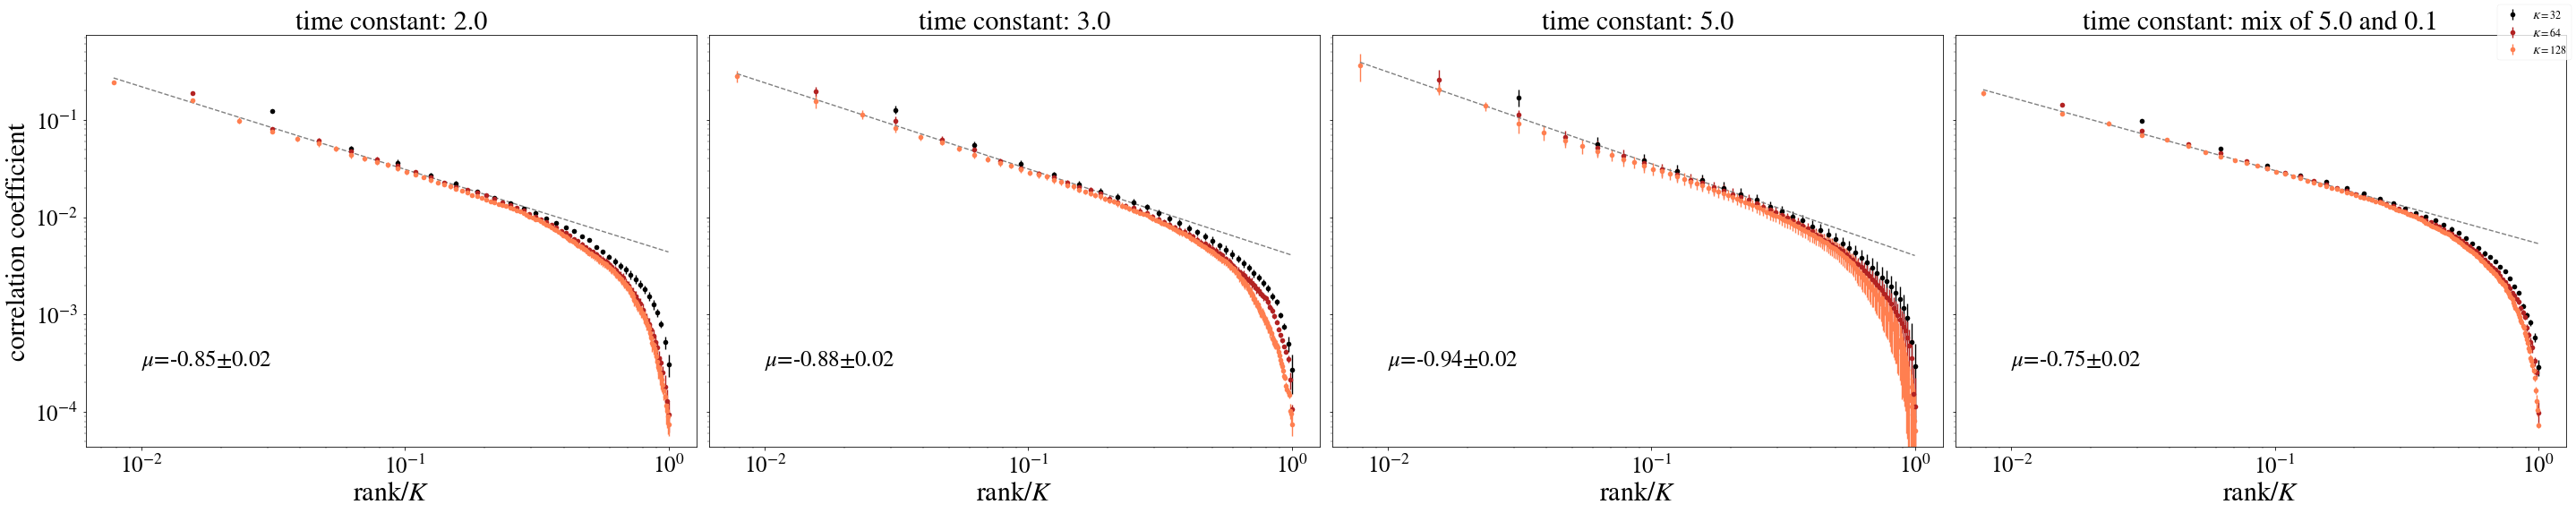

In [13]:
"""
Here plot the eigenvalues from each sucessive RG step, averaged over all clusters and
normalized by cluster size.
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(10*len(allo.coeffx), \
                                                                    int(2*len(allo.coeffx))))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for l in range(int(len(allo.eigspec))):
        errplot=allo.eigspecerr[l]
        xplot,plot=(allo.eigspecx[l], allo.eigspec[l])
        for m in range(len(xplot)):
            ax[l].errorbar(xplot[m], plot[m], yerr=errplot[m], \
                         label= r'$K=$'+str(2**(m+5)), color=palit[m], marker='o', linestyle='None')
            ax[l].set_xlabel('rank$/K$', fontsize=fontsizesmall)
        popt=allo.mu[l]
        ax[l].plot(xplot[m],linfunc(xplot[m], \
                                popt[0], popt[1]), '--', color=colorfit)
        ax[l].tick_params(labelsize=ticksizesmall)
        ax[l].set_title(str(allo.labeltype[l])+': '+str(allo.label[l]), fontsize=fontsizesmall)
        ax[l].text(.01, .0003, r'$\mu$='+ str(np.round(popt[1],2))+r'$\pm$'+str(np.round(allo.muerr[i][0], 2)), \
                   fontsize=ticksizesmall)
        ax[l].set_yscale('log')
        ax[l].set_xscale('log')
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(z, []) for z in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=12, loc='upper right')
plt.tight_layout()
name=str(envname)+'eigs.png'
plt.savefig(name)

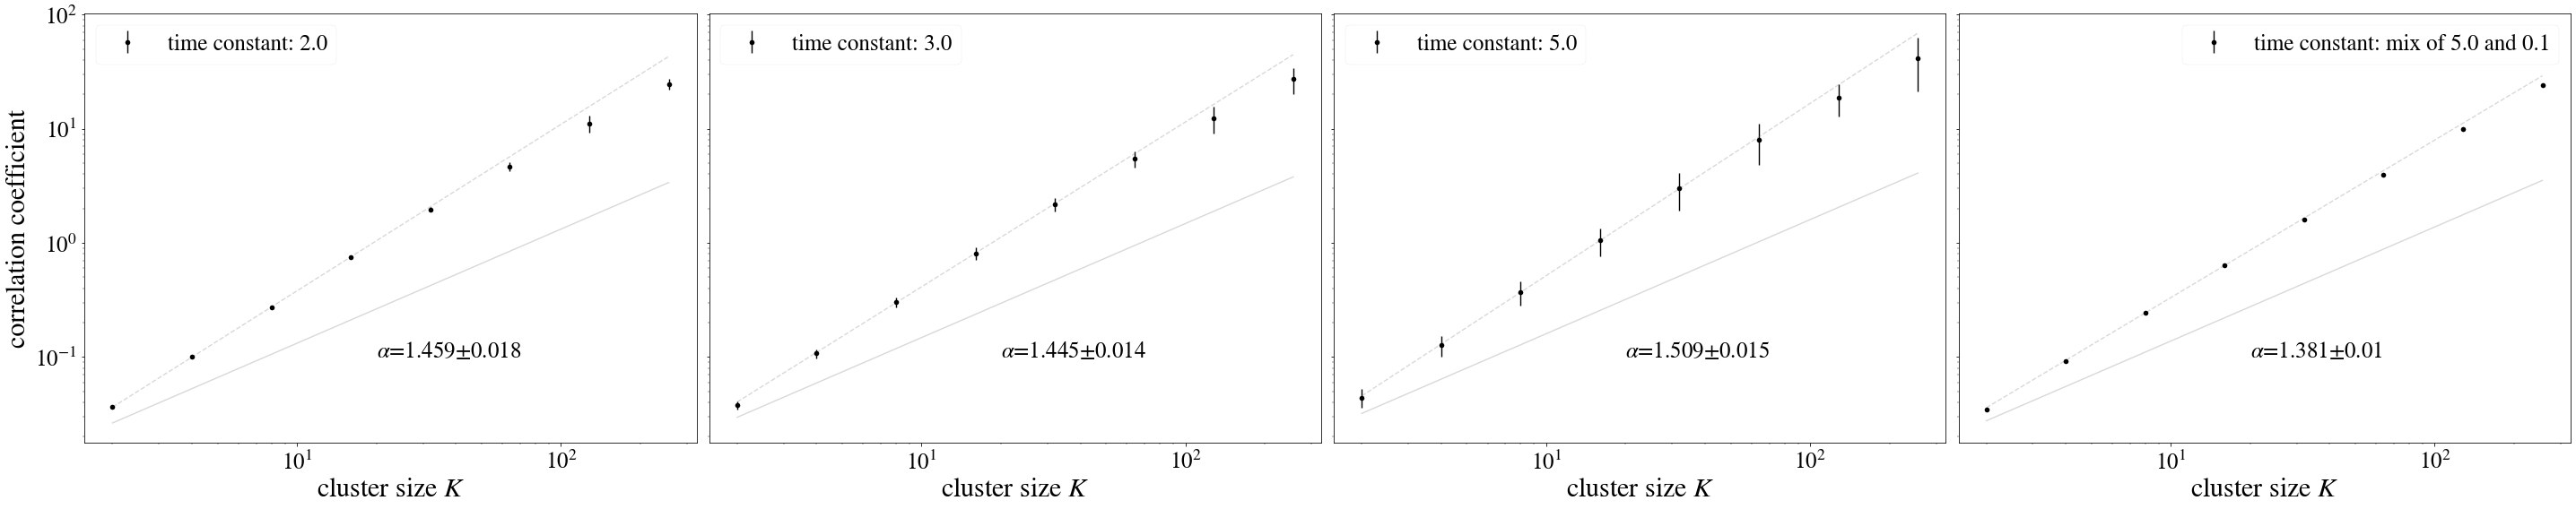

In [14]:
"""
plot coarse grained variance vs. cluster size
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(10*len(allo.coeffx), \
                                                                    int(2*len(allo.coeffx))))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for i in range(int(len(allo.eigspec))):
        ax[i].errorbar(allo.varx[i],allo.var[i],  allo.varerr[i], \
                     label=str(allo.labeltype[i])+': '+str(allo.label[i]), \
                     color='black', marker='o', linestyle='None')
        popt = allo.alpha[i]
        ax[i].plot(allo.varx[i],linfunc(allo.varx[i], \
                                popt[0], popt[1]), '--', color=colorfit, alpha=alpha)
        ax[i].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
        ax[i].plot(allo.varx[i], linfunc(allo.varx[i], popt[0], 1.), \
                     alpha=alpha, color=colorfit)
        ax[i].text(20, .1, r'${\alpha}$='+ str(np.round(popt[1],3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[i][0], 3)), fontsize=ticksizesmall)
        ax[i].tick_params(labelsize=ticksizesmall)
        ax[i].legend(fontsize=ticksizesmall)
        ax[i].set_yscale('log')
        ax[i].set_xscale('log')
plt.tight_layout()
name=str(envname)+'var.png'
plt.savefig(name)

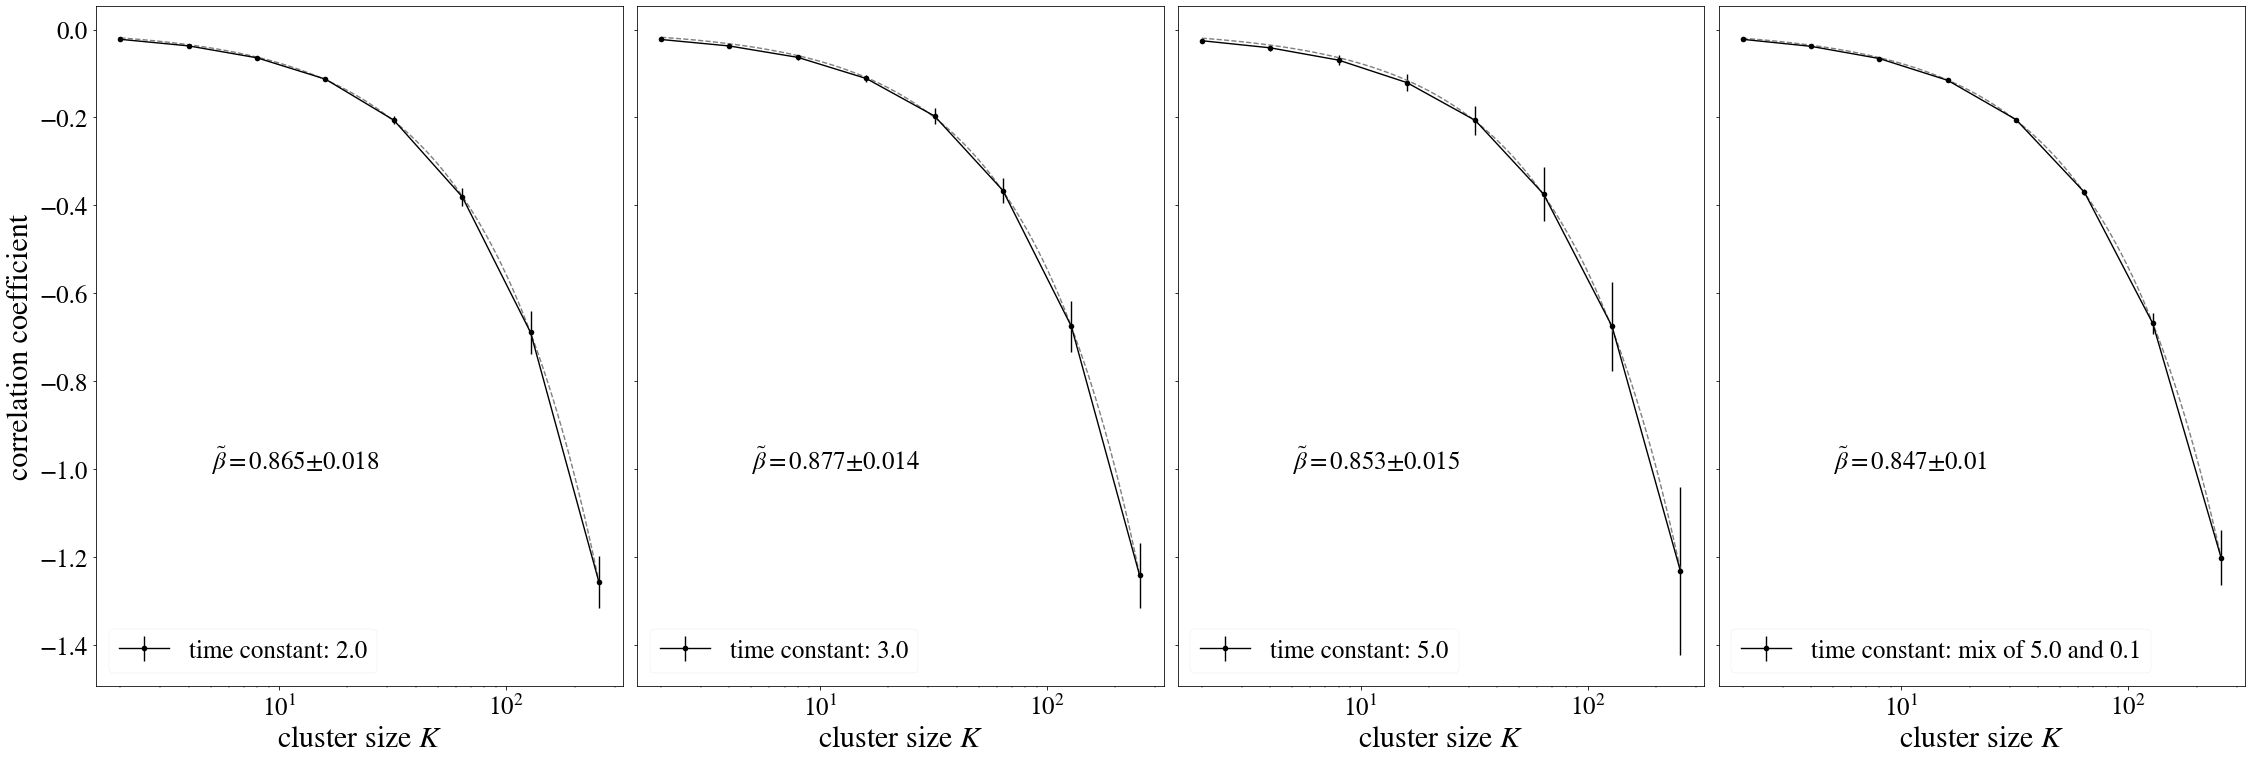

In [15]:
"""
Plot log probability of complete cluster silence vs cluster size
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(8*len(allo.coeffx), \
                                                                    int(8*len(allo.coeffx))/3))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for i in range(int(len(allo.eigspec))):
        x=allo.psilx[i]
        y=allo.psil[i]
        popt= allo.beta[i]
        ax[i].errorbar(allo.psilx[i], allo.psil[i],allo.psilerr[i], \
                     label=str(allo.labeltype[i])+': '+str(allo.label[i]), color='black', marker='o')
        ax[i].plot(np.arange(np.min(allo.psilx[i]),np.max(allo.psilx[i]), .01),\
                 (probfunc(np.arange(np.min(allo.psilx[i]),np.max(allo.psilx[i]), .01), \
                           popt[0], popt[1])), '--', color=colorfit)
        ax[i].text(5, -1.0, r'$\tilde{\beta}=$'+str(np.round(popt[1], 3))+r'$\pm$'+\
                   str(np.round(allo.alphaerr[i][0], 3)), fontsize=ticksizesmall)
        ax[i].legend(fontsize=ticksizesmall, loc='lower left')
        ax[i].tick_params(labelsize=ticksizesmall)
        ax[ i].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
        ax[i].set_xscale('log')
plt.tight_layout()
name=str(envname)+'freeenergy.png'
plt.savefig(name)

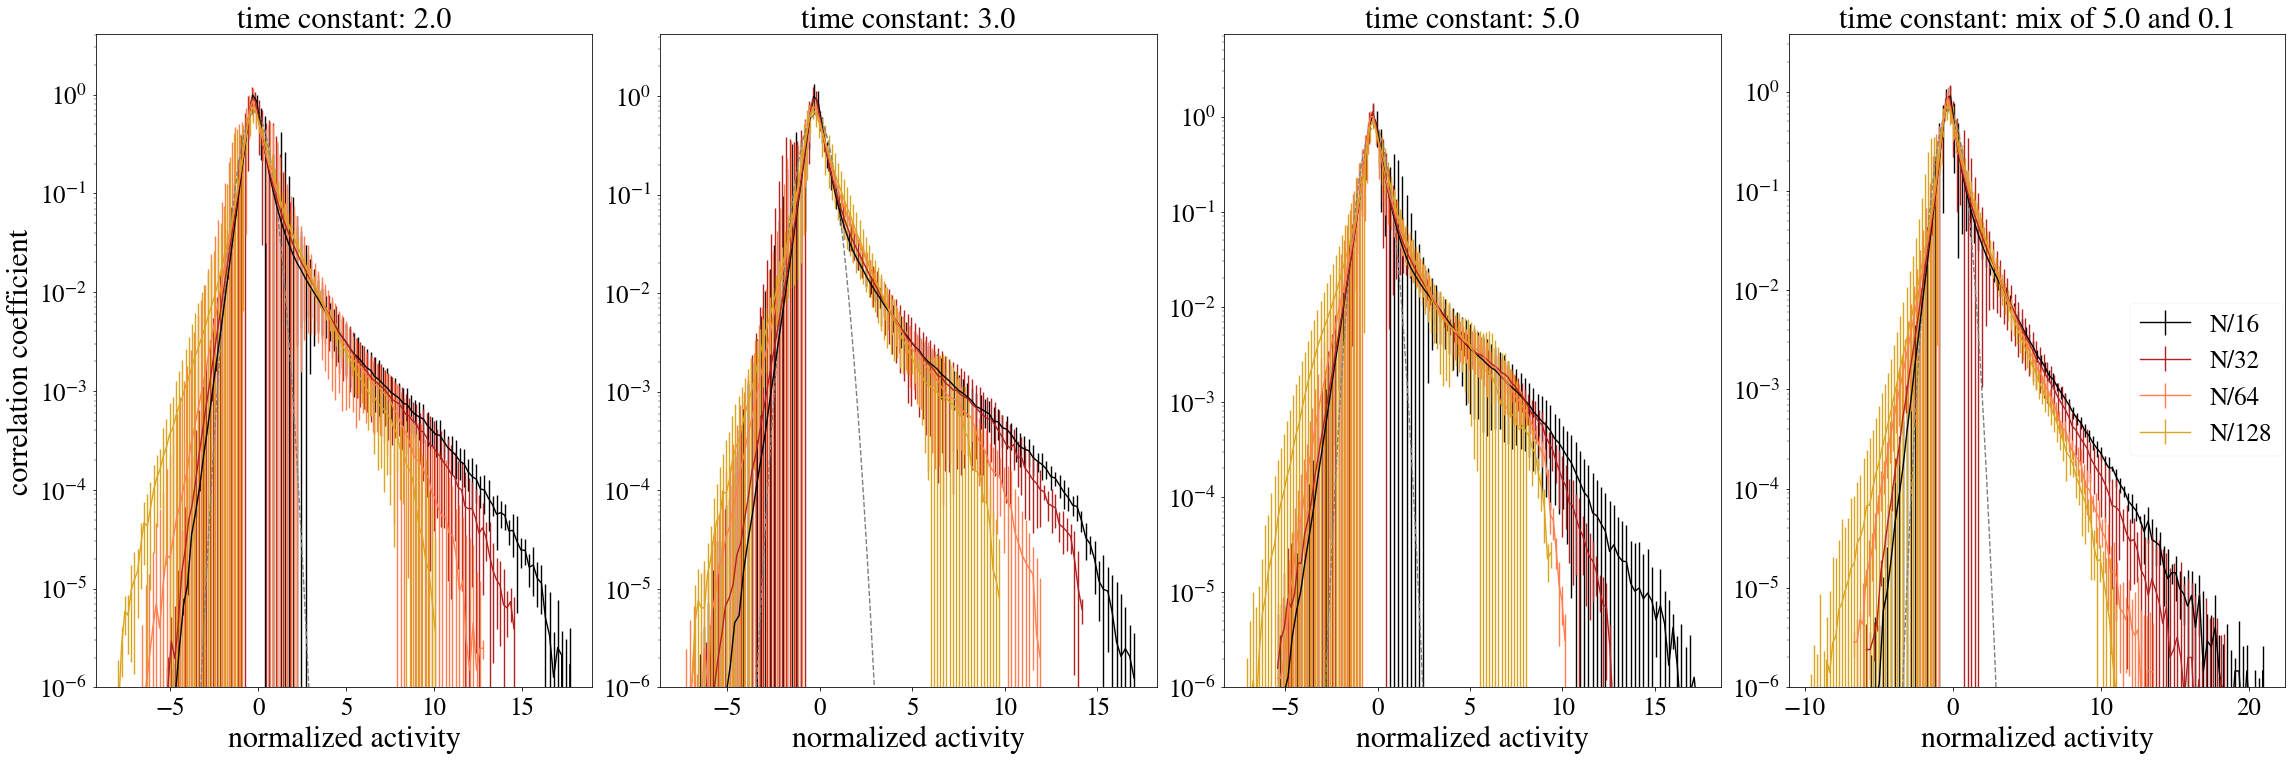

In [16]:
x=allo.actmomx
plott=allo.actmom
plterr=allo.actmomerr
fig, ax = plt.subplots(1,int(len(allo.eigspec)), figsize=(8*len(allo.coeffx), \
                                                                    int(8*len(allo.coeffx))/3))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for l in range(int(len(allo.eigspec))):
        for i in (np.arange(len(allo.actmomx[0]))):
            ax[l].errorbar(x[l][i],plott[l][i], plterr[l][i], label='N/'+str(2**(i+4)), \
                          color=palit[i])
        ax[l].set_title(str(allo.labeltype[l])+': '+str(allo.label[l]), fontsize=fontsizesmall)
        popt, pcov = curve_fit(gaussian,x[l][i], plott[l][i])
        ax[l].plot(np.arange(-4, 4,.1), \
            gaussian(np.arange(-4, 4, .1),\
            popt[0], popt[1]), '--', color=colorfit)
        ax[l].tick_params(labelsize=ticksizesmall)
        ax[l].set_xlabel('normalized activity', fontsize=fontsizesmall)
        ax[l].set_yscale('log')
        ax[l].set_ylim(10**-6)
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes[:1]]
lines, labels = [sum(z, []) for z in zip(*lines_labels)]
fig.legend(lines, labels, fontsize=ticksizesmall, loc='center right')
plt.tight_layout()
name=str(envname)+'momdist.png'
plt.savefig(name)

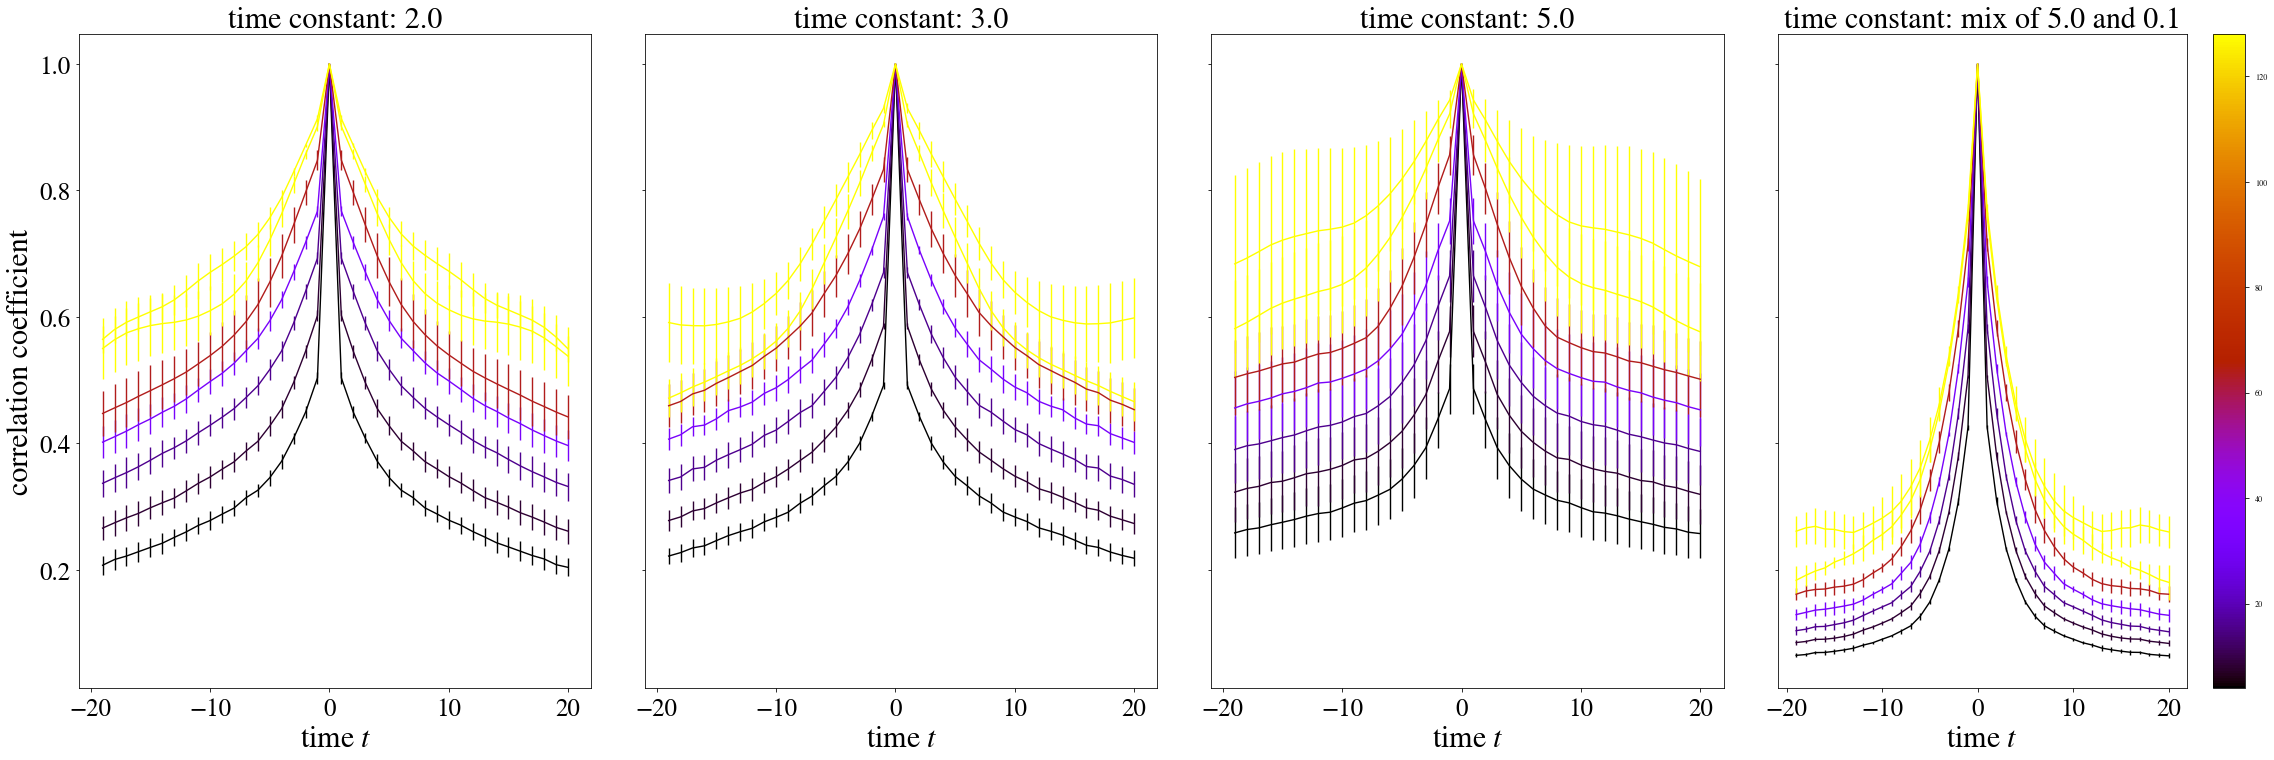

In [17]:
x=allo.autocorrx
plterr=allo.autocorrerr
result=allo.autocorr
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(8*len(allo.coeffx), \
                                                                    int(8*len(allo.coeffx))/3))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for l in range(int(len(allo.eigspec))):
        for i in range(result[l].shape[0]):
            #print(result[l][i, int(result[l].shape[1]/2)-50:int(result[l].shape[1]/2)+50])
            ax[l].errorbar((x[l][int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]), \
                     (result[l][i, int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]),\
                       (plterr[l][i][int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]), \
                           label=r'$K$ ='+str(2**(i+2)),  color=mycmap((2**(i+2)-4)/(128-4)))
            ax[l].set_xlabel(r'time $t$', fontsize=fontsizesmall)
            ax[l].set_title(str(allo.labeltype[l])+': '+str(allo.label[l]), fontsize=fontsizesmall)
            ax[l].tick_params(labelsize=ticksizesmall)
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=4, vmax=128))
plt.colorbar(sm)
plt.tight_layout()
name=str(envname)+'dynamic.png'
plt.savefig(name)

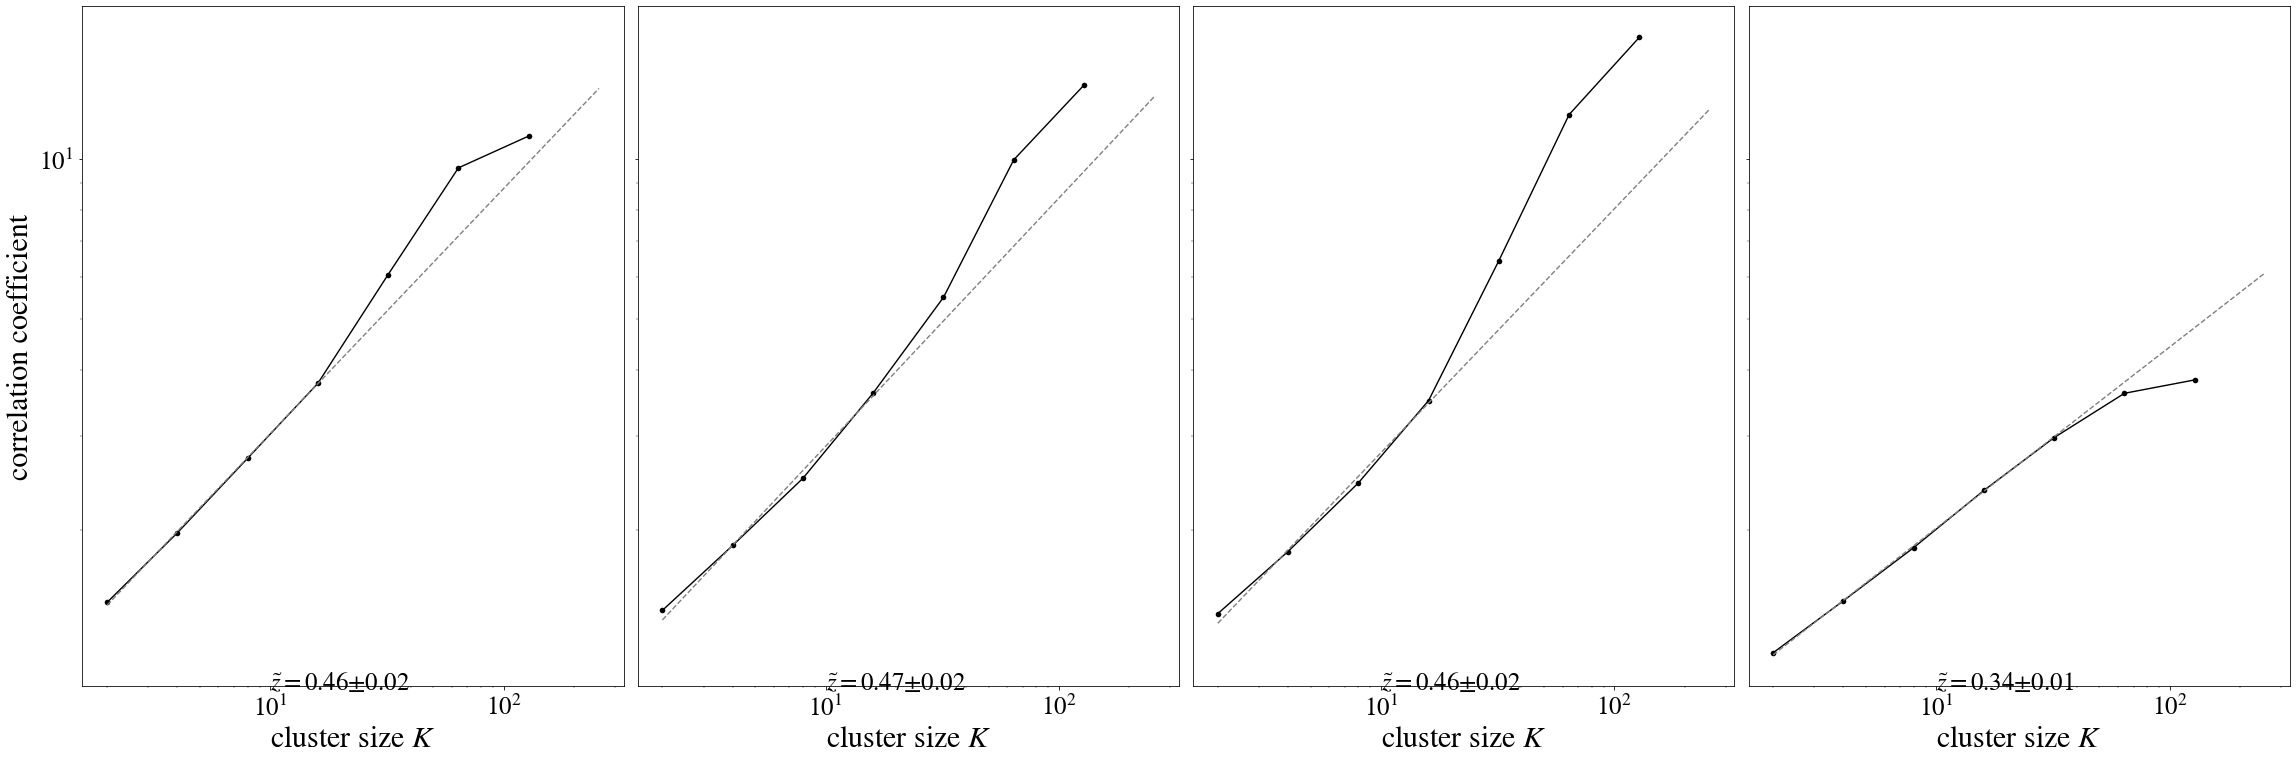

In [18]:
"""
plot exponents
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(8*len(allo.coeffx), \
                                                                    int(8*len(allo.coeffx))/3))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for l in range(int(len(allo.eigspec))):
        ax[l].plot(2**np.arange(1,8),allo.tau[l],color=colorline, \
              label='taus', marker='o')
        popt= allo.z[l]
       # print(popt[1])
        ax[l].plot(2**np.arange(1,9), linfunc(2**np.arange(1,9), \
                                    popt[0], popt[1]), '--', label='fit', color=colorfit)
        ax[l].set_xlabel(r'cluster size $K$', fontsize=fontsizesmall)
        ax[l].tick_params(labelsize=ticksizesmall)
        #ax[l].legend(fontsize=ticksize)
        ax[l].text(10, 1, r'$\tilde{z}=$'+str(np.round(popt[1],2))+r'$\pm$'+\
                   str(np.round(allo.zerr[l][0], 2)), fontsize=ticksizesmall)
        ax[l].set_yscale('log')
        ax[l].set_xscale('log')
plt.tight_layout()
name=str(envname)+'dynamicexps.png'
plt.savefig(name)

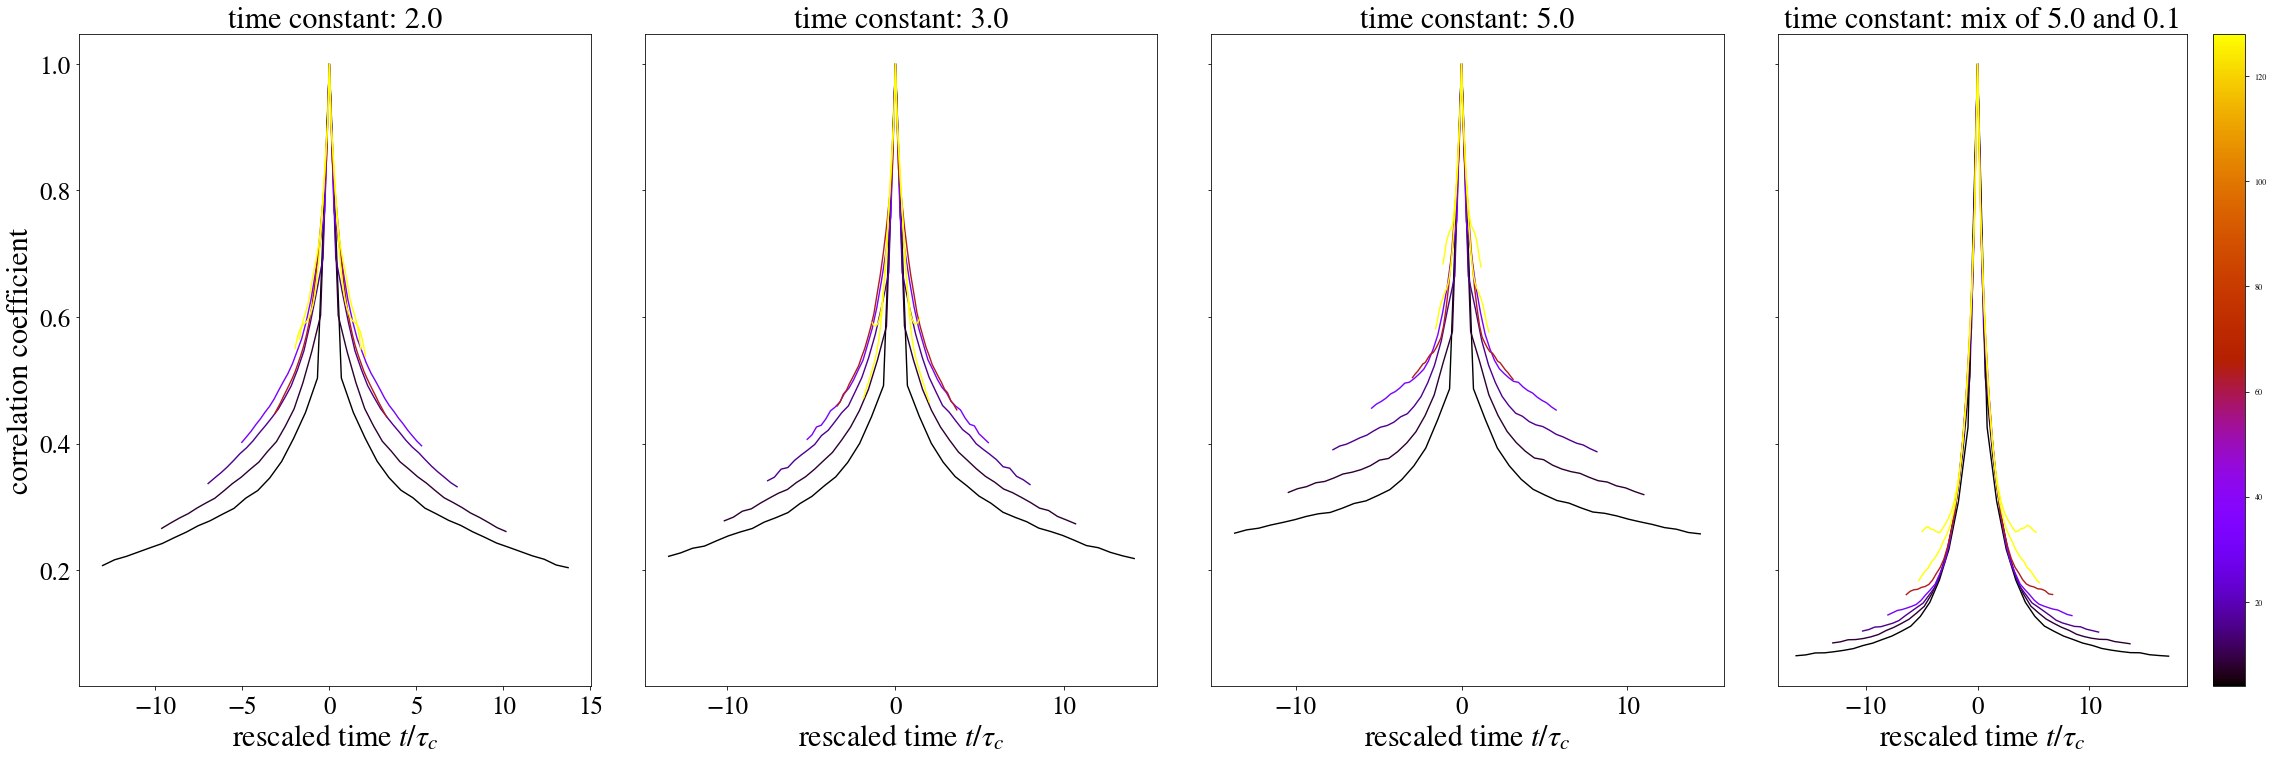

In [19]:
"""
now rescale each mean autocorrelation curve by its respective time constant
"""
fig, ax = plt.subplots(1,int(len(allo.eigspec)),  sharey='row', figsize=(8*len(allo.coeffx), \
                                                                    int(8*len(allo.coeffx))/3))
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
ax[0].set_ylabel('correlation coefficient', fontsize=fontsizesmall)
for l in range(int(len(allo.eigspec))):
        for i in range(result[l].shape[0]):
            ax[l].plot(x[l][int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]\
                       /allo.tau[l][i], \
                 result[l][i,int(result[l].shape[1]/2)-20:int(result[l].shape[1]/2)+20]\
                , '-',  label=r'$K$ ='+str(2**(i+2)), color=mycmap((2**(i+2)-4)/(128-4)))
            ax[l].set_xlabel(r'rescaled time $t/\tau_c$', fontsize=fontsizesmall)
            ax[l].tick_params(labelsize=ticksizesmall)
            ax[l].set_title(str(allo.labeltype[l])+': '+str(allo.label[l]), fontsize=fontsizesmall)
sm = plt.cm.ScalarMappable(cmap=mycmap, norm=plt.Normalize(vmin=4, vmax=128))
plt.colorbar(sm)
plt.tight_layout()
name=str(envname)+'dynamicrescale.png'
plt.savefig(name)